In [1]:
library(OligoMMR2)
library(vegan)
library(reshape2)
library(ggplot2)
library(stringr)

# Panel A: Study design

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


png 
  2

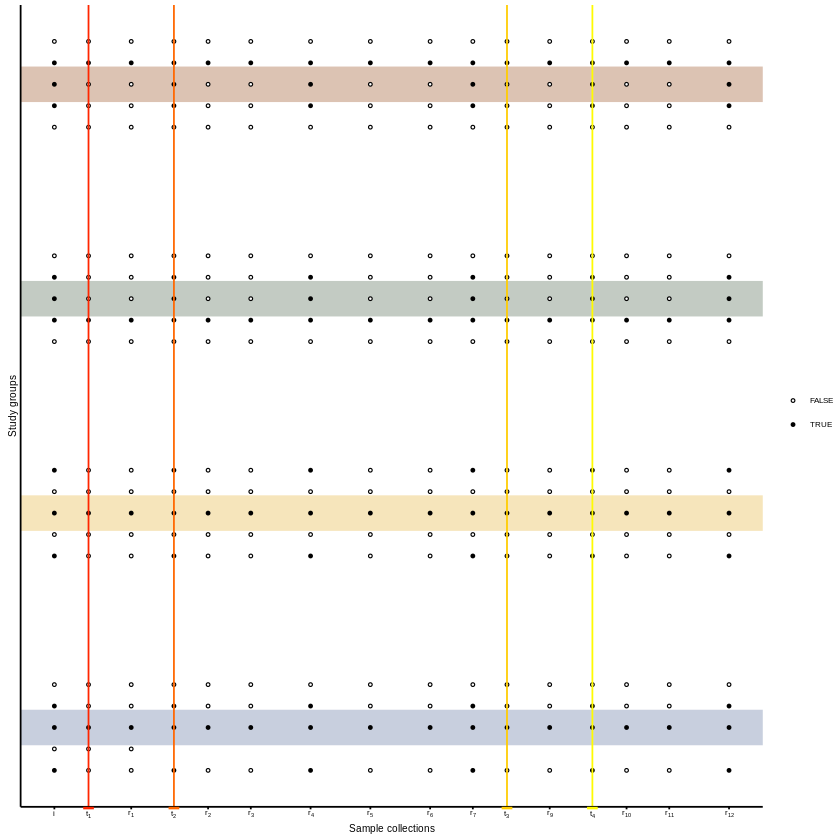

In [252]:
data(oligomm_ab_qpcr)
dat <- oligomm_ab_qpcr
rownames(dat) <- paste0(dat$mouse, "_", dat$day)
dat$universal <- NULL
dat$day <- as.integer(substr(rownames(dat), 6, 7))
dat$mouse.group <- translateMouseIdToTreatmentGroup(dat$mouse)
dat$seq <- sampleIDtoWGS(rownames(dat))
dat$dummy <- 0
dat$group_y <- 0
dat$type <- paste0(dat$group, "_", dat$mouse2)
dat[which(dat$type == "water_A"), ]$group_y <- 1
dat[which(dat$type == "water_B"), ]$group_y <- 1.1
dat[which(dat$type == "water_C"), ]$group_y <- 1.2
dat[which(dat$type == "water_D"), ]$group_y <- 1.3
dat[which(dat$type == "water_E"), ]$group_y <- 1.4
dat[which(dat$type == "Ciprofloxacin_A"), ]$group_y <- 2
dat[which(dat$type == "Ciprofloxacin_B"), ]$group_y <- 2.1
dat[which(dat$type == "Ciprofloxacin_C"), ]$group_y <- 2.2
dat[which(dat$type == "Ciprofloxacin_D"), ]$group_y <- 2.3
dat[which(dat$type == "Ciprofloxacin_E"), ]$group_y <- 2.4
dat[which(dat$type == "Tetracyclin_A"), ]$group_y <- 3
dat[which(dat$type == "Tetracyclin_B"), ]$group_y <- 3.1
dat[which(dat$type == "Tetracyclin_C"), ]$group_y <- 3.2
dat[which(dat$type == "Tetracyclin_D"), ]$group_y <- 3.3
dat[which(dat$type == "Tetracyclin_E"), ]$group_y <- 3.4
dat[which(dat$type == "Vancomycin_A"), ]$group_y <- 4
dat[which(dat$type == "Vancomycin_B"), ]$group_y <- 4.1
dat[which(dat$type == "Vancomycin_C"), ]$group_y <- 4.2
dat[which(dat$type == "Vancomycin_D"), ]$group_y <- 4.3
dat[which(dat$type == "Vancomycin_E"), ]$group_y <- 4.4

dat$seq <- sampleIDtoWGS(rownames(dat))
library(ggplot2)
p <- ggplot(dat, aes(x = day, y = group_y, fill = seq))
p <-
  p + geom_hline(
    alpha = .3,
    yintercept = c(1.2, 2.2, 3.2, 4.2),
    size = 10,
    color = c("#476090", "#E0A91B", "#385337", "#8C3701")
  )
p <- p + theme_pmuench()
p <- p + geom_point(size = .7, pch = 21)
p <- p + xlab("Sample collections") + ylab("Study groups")
p <- p + geom_vline(
  xintercept = c(4, 14, 53, 63),
  color = c("#FF2600", "#FF6701", "#FFCC01", "#FFFB00")
)
p <-
  p + scale_color_manual(values = c("FALSE" = "grey60", "TRUE" = "black"))
p <- p + scale_shape_manual(values = c(16, 21))
p <-
  p + scale_fill_manual(values = c("FALSE" = "white", "TRUE" = "black"))
p <- p + scale_y_continuous(breaks = c())
p <- p + scale_x_continuous(
  breaks = c(0, 4, 9, 14, 18,
             23, 30, 37, 44, 49,
             53, 58, 63, 67, 72, 79),
  labels = c(
    expression(i),
    expression(t[1]),
    expression(r[1]) ,
    expression(t[2]),
    expression(r[2]) ,
    expression(r[3]),
    expression(r[4]),
    expression(r[5]),
    expression(r[6]),
    expression(r[7]),
    expression(t[3]),
    expression(r[9]),
    expression(t[4]),
    expression(r[10]),
    expression(r[11]),
    expression(r[12])
  )
)

p <-
  p + theme(axis.ticks.x = element_line(
    color = c(
      "black",
      "#FF2600",
      "black",
      "#FF6701",
      "black",
      "black",
      "black",
      "black",
      "black",
      "black",
      "#FFCC01",
      "black",
      "#FFFB00",
      "black",
      "black",
      "black"
    ),
    size = c(.5, 3, .5, 3, .5, .5, .5,
             .5, .5, .5, 3, .5, 3, .5,
             .5, .5)
  ))
p <- p + labs(fill = "", color = "")
p

pdf("panel_a2.pdf", width = 2.8, height = 2.3)
print(p)
dev.off()

# Panel B: TODO

In [13]:
unique(dat.m$variable)

[1] "E. faecalis"         "B. animalis"         "A. muris"           
 [4] "M. intestinale"      "F. plautii"          "E. clostridioformis"
 [7] "A. muciniphila"      "T. muris"            "C. innocuum"        
[10] "B. caecimuris"       "L. reuteri"          "B. coccoides"

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


png 
  2

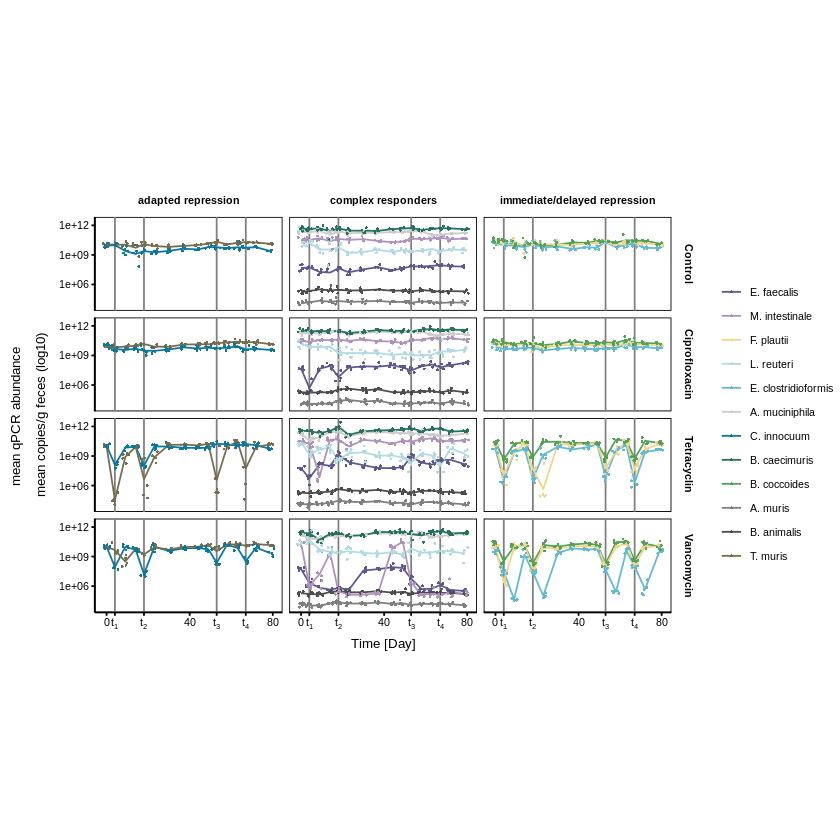

In [201]:
data("oligomm_ab_qpcr")
dat <- oligomm_ab_qpcr
dat$universal <- NULL
species_names <- read.table("members.txt", sep = ";", header = T)

dat.m <-
  melt(dat, id.vars = c("day", "mouse2" , "group", "mouse", "applicaiton"))

# replace species ID with full nmae
dat.m$variable <-
  species_names[match(dat.m$variable, species_names$ID), ]$species
dat.m$group <- str_replace(dat.m$group, "water", "Control")

dat.m$set <- "none"

dat.m[which(dat.m$variable == "F. plautii"), ]$set <- "immediate/delayed repression"
dat.m[which(dat.m$variable == "B. caecimuris"), ]$set <- "complex responders"
dat.m[which(dat.m$variable == "A. muciniphila"), ]$set <- "complex responders"
dat.m[which(dat.m$variable == "T. muris"), ]$set <- "adapted repression"
dat.m[which(dat.m$variable == "E. faecalis"), ]$set <- "complex responders"
dat.m[which(dat.m$variable == "C. innocuum"), ]$set <- "adapted repression"
dat.m[which(dat.m$variable == "F. plautii"), ]$set <- "immediate/delayed repression"
dat.m[which(dat.m$variable == "E. clostridioformis"), ]$set <- "immediate/delayed repression"
dat.m[which(dat.m$variable == "B. coccoides"), ]$set <- "immediate/delayed repression"
dat.m[which(dat.m$variable == "M. intestinale"), ]$set <- "complex responders"
dat.m[which(dat.m$variable == "E. clostridioformis"), ]$set <- "immediate/delayed repression"
dat.m[which(dat.m$variable == "A. muris"), ]$set <- "complex responders"

dat.m[which(dat.m$variable == "L. reuteri"), ]$set <- "complex responders"
dat.m[which(dat.m$variable == "B. animalis"), ]$set <- "complex responders"

species_names <- read.table("members.txt", sep = ";", header = T)

species_cols_names <- c(
  "E. faecalis" = "#5D598E",
  "M. intestinale" = "#AF92BB",
  "F. plautii" = "#F1D687",
  "L. reuteri" = "#B2DAE3",
  "E. clostridioformis" = "#61B9D3",
  "A. muciniphila" = "grey80",
  "C. innocuum" = "#09789F",
  "B. caecimuris" = "#257160",
  "B. coccoides" = "#53A256",
  "A. muris" = "grey50",
  "B. animalis" = "grey30",
  "T. muris" = "#756D4D",
  "B. caecimuris" = "black")

dat.m$group <- factor(dat.m$group, levels = c("Control", "Ciprofloxacin", "Tetracyclin", "Vancomycin"))

p <- ggplot(dat.m, aes(
    x = day, value,
    color = variable,
    group = variable))

p <- p + geom_vline(xintercept = 4,
                    color = "grey50",
                    size = .5)
p <- p + geom_vline(xintercept = 18,
                    color = "grey50",
                    size = .5)
p <- p + geom_vline(xintercept = 53,
                    color = "grey50",
                    size = .5)
p <- p + geom_vline(xintercept = 67,
                    color = "grey50",
                    size = .5)
p <- p + stat_summary(
    fun.y = mean,
    fun.ymin = mean,
    fun.ymax = mean,
    geom = "line",
    size = .5)
p <- p + facet_grid(group ~ set)
p <- p + theme_pmuench(base_size = 8)  + scale_y_log10()
p <- p + geom_jitter(size = .8, stroke = 0)
p <- p + scale_color_manual(values = species_cols_names)

p <- p + xlab('Time [Day]') + ylab(expression(atop(
    "mean qPCR abundance ", paste("mean copies/g feces (log10)")
  ))) +  theme(legend.position = "right")
p <- p + labs(fill = "",
              color = "",
              shape = "")

p <- p + scale_x_continuous(
  breaks = c(0, 4,  18, 40, 53, 67, 80),
  labels = c(
    "0",
    expression(t[1]),
    expression(t[2]),
    "40",
    expression(t[3]),
    expression(t[4]),
    "80"
  )
)
p <-
  p + theme(axis.ticks.x = element_line(
    color = c("black", "black", "black", "black", "black", "black"),
    size = c(.5, .5, .5, .5, .5, .5)
  ))
p <- p + theme(aspect.ratio = .5, strip.background = element_blank(), strip.placement = "outside")
p <- p + theme(panel.background = element_rect(fill = "white", colour = 'black'))

#p <- p + theme(aspect.ratio = .25)
p
pdf(file = "Figure_1_qpcr_absolute.pdf",
    width = 8, # 4
    height = 4.6)
print(p)
dev.off()

# Panel C: Relative abundances

In [234]:
data(oligomm_ab_qpcr)
dat <- oligomm_ab_qpcr
rownames(dat) <- paste0(dat$mouse, "_", dat$day)
dat$universal <- NULL

annot <- dat[, c(1:5)]
qpcr <- dat[, -c(1:5)]
qpcr <- data.matrix(qpcr)
qpcr <- t(apply(qpcr, 1, function(x)
  x / sum(x)))

                
dat <- cbind(annot, qpcr)

species_names <- read.table("members.txt", sep = ";", header = T)


dat.m <-
  melt(dat, id.vars = c("day", "mouse2" , "group", "mouse", "applicaiton"))
# replace species ID with full nmae
dat.m$variable <-
  species_names[match(dat.m$variable, species_names$ID), ]$species
#dat.m <- dat.m[which(dat.m$group == "water"),]
dat.m$group <- str_replace(dat.m$group, "water", "Control")

dat.m <- stats::aggregate(value ~ variable + group + day,
                        data = dat.m, FUN = "mean")


species_cols_names <- c(
  "E. faecalis" = "#5D598E",
  "M. intestinale" = "#AF92BB",
  "F. plautii" = "#F1D687",
  "L. reuteri" = "#B2DAE3",
  "E. clostridioformis" = "#61B9D3",
  "A. muciniphila" = "grey80",
  "C. innocuum" = "#09789F",
  "B. caecimuris" = "#257160",
  "B. coccoides" = "#53A256",
  "A. muris" = "grey50",
  "B. animalis" = "grey30",
  "T. muris" = "#756D4D",
  "B. caecimuris" = "black"
)
                
dat.m$dummy <- "all"

In [229]:

# read qPCR data
dat <- oligomm_ab_qpcr
dat$universal <- NULL

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


png 
  2

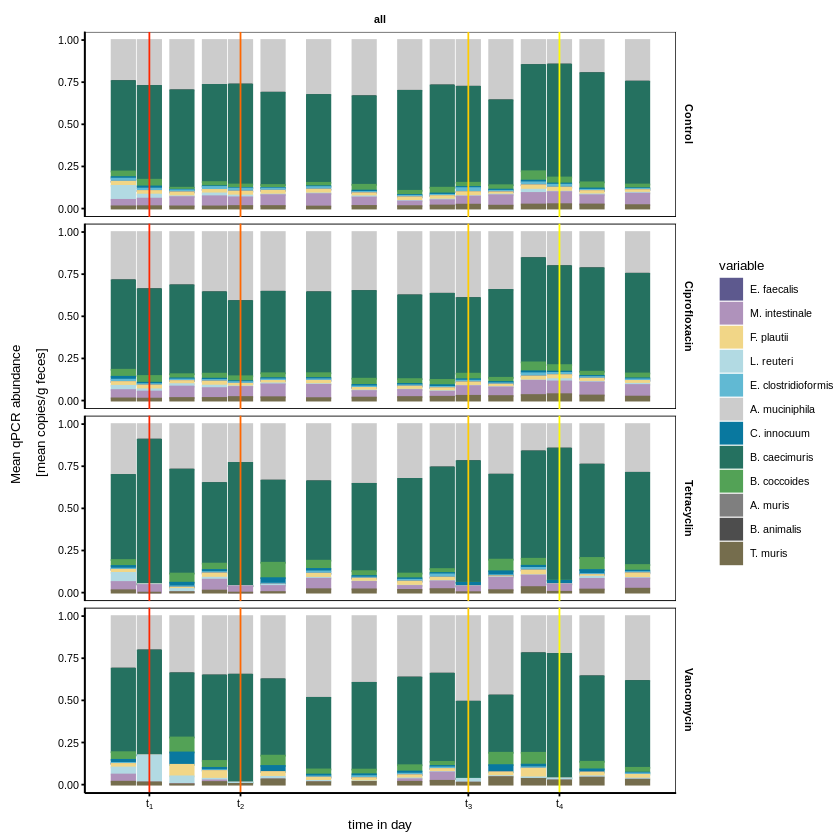

In [251]:
dat.m$group <- factor(dat.m$group, levels = c("Control", "Ciprofloxacin", "Tetracyclin", "Vancomycin"))


p <- ggplot(dat.m, aes(x = day, value, color = variable, fill = variable))
p <- p + geom_bar(stat = "identity")
p <- p + facet_grid(group ~ dummy)
p <- p + theme_pmuench(base_size = 8)
p <- p + geom_vline(xintercept = 4, color = "#FF2600", size = .5)
p <- p + geom_vline(xintercept = 18, color = "#FF6701", size = .5)
p <- p + geom_vline(xintercept = 53, color = "#FFCC01", size = .5)
p <- p + geom_vline(xintercept = 67, color = "#FFFB00", size = .5)
p <- p + scale_color_manual(values = species_cols_names)
p <- p + scale_fill_manual(values = species_cols_names)

p <- p + xlab('time in day') + ylab(expression(atop(
    "Mean qPCR abundance ", paste("[mean copies/g feces]")
  ))) +  theme(legend.position = "right")

p <- p + scale_x_continuous(
  breaks = c(4,  18, 53, 67),
  labels = c(
    expression(t[1]), expression(t[2]), expression(t[3]), expression(t[4])))
p <-
  p + theme(axis.ticks.x = element_line(
    color = c("black", "black", "black", "black", "black", "black"),
    size = c(.5, .5, .5, .5, .5, .5)
  ))

p <- p + theme_pmuench(base_size = 8)
p <- p + theme(plot.title = element_text(size = 8))
p <- p + theme(panel.background = element_rect(fill = "white", colour = 'black'))
p

pdf(file = "Figure_1_qpcr_relative.pdf",
  width = 2.5,
    height = 4.55)
print(p)
dev.off()

# Panel D: TODO

ERROR: Error in qpcr$groups: $ operator is invalid for atomic vectors


In [203]:
dat <- read.table("values.csv", header = T, sep = ";")
rownames(dat) <- paste0(dat$mouse, "_", dat$day)
dat$universal <- NULL
qpcr <- dat[, -c(1:5)]
qpcr <- apply(qpcr, 1, function(x)
  x / sum(x))
qpcr <- t(qpcr)
              
groups <-
  translateMouseIdToTreatmentGroup(substr(rownames(qpcr), 1, 4))
              
unique(groups)
              qpcr2 <- qpcr
              # qpcr2 <-
#  qpcr[which(groups == "Vancomycin" | groups == "Tetracyclin"), ]
#qpcr2 <-
#  qpcr[which(groups == "Control"  | groups == "Vancomycin" ,),]

[1] "Control"       "Ciprofloxacin" "Tetracyclin"   "Vancomycin"

In [204]:
nmds <- vegan::metaMDS(qpcr2, distance = "bray", trymax = 300)
data.scores <- as.data.frame(scores(nmds))
data.scores$mouse.id <- substr(rownames(data.scores), 1, 4)
data.scores$day <- as.integer(substr(rownames(data.scores), 6, 7))
data.scores$day3 <-
  translateMouseIdToTreatmentGroup(data.scores$mouse.id)
data.scores$mouse.group <-
  translateMouseIdToTreatmentGroup(data.scores$mouse.id)

unique(data.scores$day)
data.scores$day2 <- "resilience"
data.scores[which(data.scores$day == 4), ]$day2 <- "treatment1"
data.scores[which(data.scores$day == 18), ]$day2 <- "treatment2"
data.scores[which(data.scores$day == 53), ]$day2 <- "treatment3"
data.scores[which(data.scores$day == 67), ]$day2 <- "treatment4"
data.scores[which(data.scores$day == 0), ]$day2 <-
  "initial community"
data.scores[which(data.scores$day > 67), ]$day2 <- "after treatment"

#data.scores[which(data.scores$mouse.id != "1696"),]$mouse.id <- ""

colorval <- c(
  "resilience" = "#A0258F",
  "treatment1" = "#FF2600",
  "treatment2" = "#FF6701",
  "treatment3" = "#FFCC01",
  "treatment4" = "#FFFB00",
  "initial community" = "#029975",
  "after treatment" = "#3E98D3"
)

Run 0 stress 0.09067239 
Run 1 stress 0.1161817 
Run 2 stress 0.1081595 
Run 3 stress 0.1148179 
Run 4 stress 0.111756 
Run 5 stress 0.1144449 
Run 6 stress 0.1136681 
Run 7 stress 0.1116549 
Run 8 stress 0.1111128 
Run 9 stress 0.1197526 
Run 10 stress 0.4182803 
Run 11 stress 0.1116891 
Run 12 stress 0.09368093 
Run 13 stress 0.1102812 
Run 14 stress 0.1090284 
Run 15 stress 0.1238522 
Run 16 stress 0.1067204 
Run 17 stress 0.1021889 
Run 18 stress 0.1094172 
Run 19 stress 0.120892 
Run 20 stress 0.1010143 
Run 21 stress 0.1174355 
Run 22 stress 0.1156516 
Run 23 stress 0.0996004 
Run 24 stress 0.1118087 
Run 25 stress 0.108488 
Run 26 stress 0.1078869 
Run 27 stress 0.1143855 
Run 28 stress 0.1216917 
Run 29 stress 0.418277 
Run 30 stress 0.1095384 
Run 31 stress 0.1029533 
Run 32 stress 0.1167134 
Run 33 stress 0.1084974 
Run 34 stress 0.1246934 
Run 35 stress 0.1048338 
Run 36 stress 0.112172 
Run 37 stress 0.1105789 
Run 38 stress 0.1100762 
Run 39 stress 0.1232741 
Run 40 stress

[1]  0  4  9 14 18 23 30 37 44 49 53 58 63 67 72 79

In [208]:
nmds


Call:
vegan::metaMDS(comm = qpcr2, distance = "bray", trymax = 300) 

global Multidimensional Scaling using monoMDS

Data:     qpcr2 
Distance: bray 

Dimensions: 2 
Stress:     0.09067239 
Stress type 1, weak ties
No convergent solutions - best solution after 300 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘qpcr2’ 


In [205]:
head(data.scores)

data.scores$mouse.group <- factor(data.scores$mouse.group, levels = c("Control",
                                                          "Ciprofloxacin",
                                                                      "Tetracyclin",
                                                          "Vancomycin"
                                                         ))

head(data.scores)

,NMDS1,NMDS2,mouse.id,day,day3,mouse.group,day2
,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
1681_0,-0.008910286,0.01176087,1681,0,Control,Control,initial community
1682_0,-0.090585899,-0.03408016,1682,0,Control,Control,initial community
1683_0,0.116054108,-0.63161586,1683,0,Control,Control,initial community
1684_0,-0.013402638,-0.02912892,1684,0,Control,Control,initial community
1685_0,-0.188772521,-0.09780803,1685,0,Control,Control,initial community
1686_0,0.192242056,-0.06835407,1686,0,Ciprofloxacin,Ciprofloxacin,initial community


,NMDS1,NMDS2,mouse.id,day,day3,mouse.group,day2
,<dbl>,<dbl>,<chr>,<int>,<chr>,<fct>,<chr>
1681_0,-0.008910286,0.01176087,1681,0,Control,Control,initial community
1682_0,-0.090585899,-0.03408016,1682,0,Control,Control,initial community
1683_0,0.116054108,-0.63161586,1683,0,Control,Control,initial community
1684_0,-0.013402638,-0.02912892,1684,0,Control,Control,initial community
1685_0,-0.188772521,-0.09780803,1685,0,Control,Control,initial community
1686_0,0.192242056,-0.06835407,1686,0,Ciprofloxacin,Ciprofloxacin,initial community


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


png 
  2

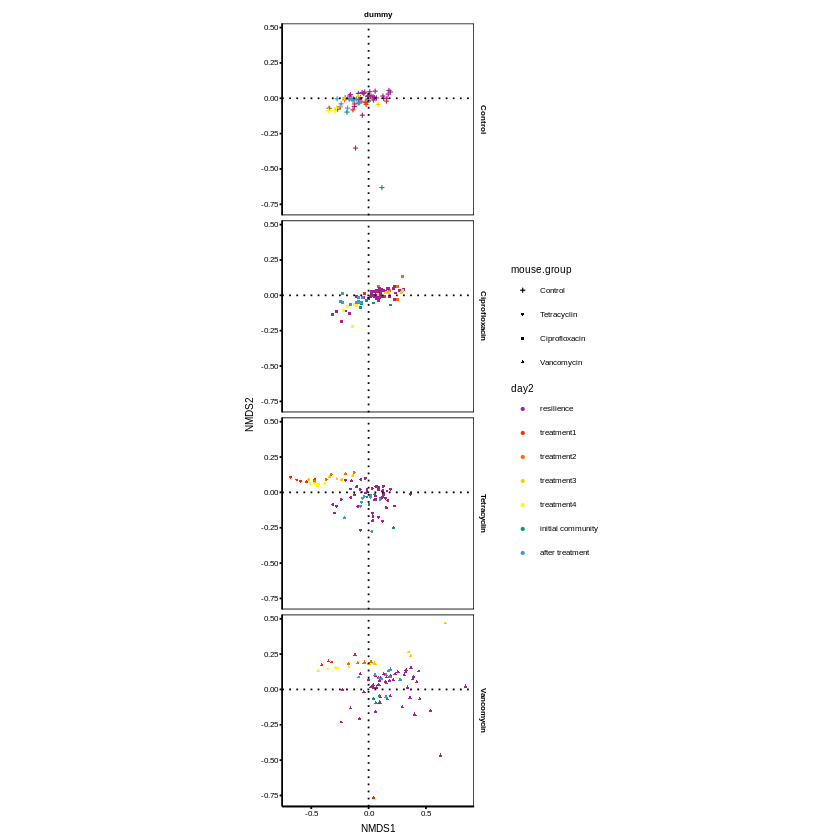

In [207]:
data.scores$dummy <- "dummy"

p <- ggplot(data.scores, aes(x = NMDS1, y = NMDS2, color = day2))
p <- p + geom_point(aes(shape = mouse.group), size = .5)
p <- p + facet_grid(mouse.group ~dummy)#, nrow = 4, strip.position="right")
p <- p + geom_hline(yintercept = 0, linetype = 3) + theme_pmuench()
p <- p + geom_vline(xintercept = 0, linetype = 3) #+ stat_ellipse(size = .1)
p <- p + scale_color_manual(values = colorval)
p <- p + scale_shape_manual(values = c("Control" = 3, 
                                      "Tetracyclin" = 16,
                                       "Ciprofloxacin" = 15,
                                       "Vancomycin" = 17))
p <- p + scale_fill_manual(values = colorval)
p <- p + theme_pmuench()
p <- p + theme(aspect.ratio = 1) + theme(plot.title = element_text(size = 8))
p <- p + theme(panel.background = element_rect(fill = "white", colour = 'black'))
p

pdf(file = "Figure_1_mds.pdf",
    width = 8, # 4
    height = 4.38)
print(p)
dev.off()

In [72]:
dev.off()

null device 
          1

In [62]:
pdf("test.pdf",  width = 7)
print(p)
dev.off()

png 
  2

# Panel E: Stability

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“Ignoring unknown parameters: width”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“Ignoring unknown parameters: width”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


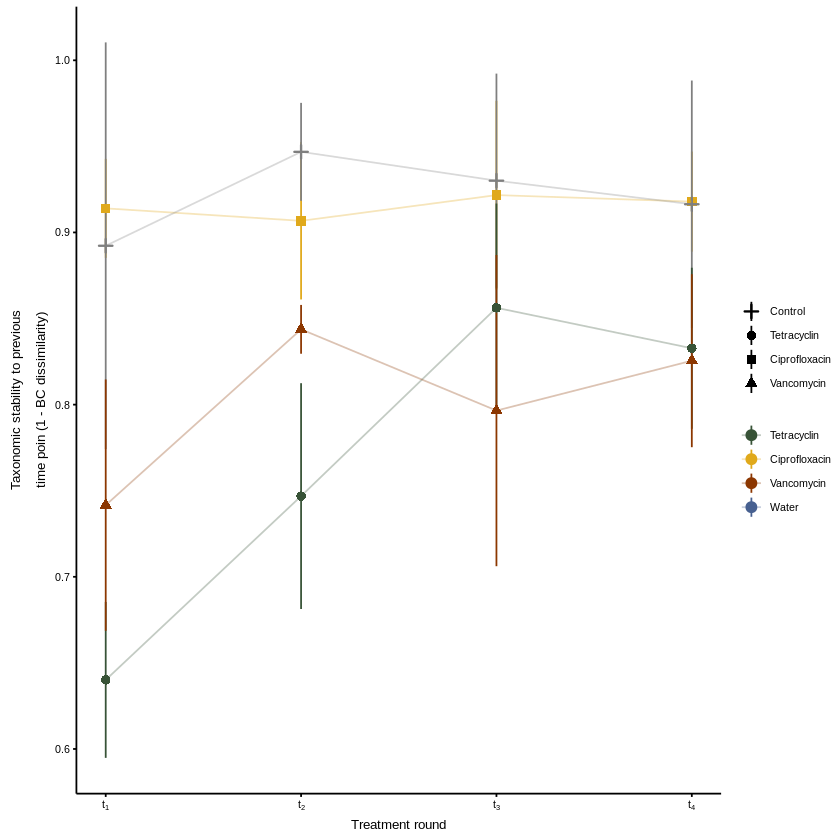

In [226]:
dat <- read.table("values.csv", header = T, sep = ";")
rownames(dat) <- paste0(dat$mouse, "_", dat$day)
dat$universal <- NULL

qpcr <- dat[, -c(1:5)]
qpcr <- apply(qpcr, 1, function(x)
  x / sum(x))
qpcr <- t(qpcr)
div <- vegan::vegdist(qpcr, method = "bray")
df <- as.matrix(div)

meta <- data.frame(sample = rownames(qpcr))

df <- reshape2::melt(df)
colnames(df) <- c("mouse.a", "mouse.b", "bc")

df$a.day <- as.integer(substr(df$mouse.a, 6, 7))
df$a.mouse.id <-  substr(df$mouse.a, 1, 4)
df$a.mouse.group <- translateMouseIdToTreatmentGroup(df$a.mouse.id)
df$a.phase_num <- binDaysByShortPhase(df$a.day)

df$b.day <- as.integer(substr(df$mouse.b, 6, 7))
df$b.mouse.id <-  substr(df$mouse.b, 1, 4)
df$b.mouse.group <- translateMouseIdToTreatmentGroup(df$b.mouse.id)
df$b.phase_num <- binDaysByShortPhase(df$b.day)

df <-
  df[which(df$a.mouse.id == df$b.mouse.id), ] # only compare same mice
df <- df[which(df$a.phase_num == 0 & df$b.phase_num == 1), ]
df <- df[which(df$a.day < df$b.day), ]
df <- df[which((df$b.day - df$a.day) < 9), ]

df$round <- 0
df[which(df$b.day == 4),]$round <- 1
df[which(df$b.day == 18),]$round <- 2
df[which(df$b.day == 53),]$round <- 3
df[which(df$b.day == 67),]$round <- 4

plot_cols <- c("Tetracyclin" = "#385337",
    "Ciprofloxacin" = "#E0A91B",
    "Vancomycin" = "#8C3701",
    "Water" = "#476090")

p <- ggplot(df, aes(x = round,
           y = 1 - bc , color = b.mouse.group,
           group = a.mouse.id ))
p <- p  + theme_pmuench(base_size = 8)
p <- p + scale_color_manual(values = plot_cols)
p <- p + stat_summary(aes(group = NULL, shape = b.mouse.group),
    fun.y = mean, width = .2, size = .5, fun.ymin = function(x)
      mean(x) - sd(x), fun.ymax = function(x)
      mean(x) + sd(x), geom = "pointrange")
p <- p + scale_shape_manual(values = c("Control" = 3, 
                                      "Tetracyclin" = 16,
                                       "Ciprofloxacin" = 15,
                                       "Vancomycin" = 17))
p <- p + stat_summary(aes(group = NULL),
    fun.y = mean, width = 1, size = .5, geom = "line", alpha = .3)
p <- p + xlab("Treatment round") + ylab(expression(atop(
    "Taxonomic stability to previous",
    paste("time poin (1 - BC dissimilarity)"))))
#p <- p + geom_jitter(size = 1, stroke = 0, aes(shape = b.mouse.group))
p <- p + scale_x_continuous(breaks = c(1, 2, 3, 4), labels = c(
    expression(t[1]),
    expression(t[2]),
    expression(t[3]),
    expression(t[4])))
p <- p + theme(axis.text.x = element_text(color = c(
    "#000000", "#000000", "#000000", "#000000")),
  axis.ticks.x = element_line(
    color = c("#000000", "#000000", "#000000", "#000000")))
   # size = c(2, 2, 2, 2)))
p <- p + labs(fill = "", color = "", shape = "") 
p

In [224]:
pdf(file = "Figure_1_stable.pdf",
    width = 3,
    height = 2.2)
print(p)
dev.off()

png 
  2

Run 0 stress 0.08595572 
Run 1 stress 0.1033186 
Run 2 stress 0.1058093 
Run 3 stress 0.09670445 
Run 4 stress 0.1009096 
Run 5 stress 0.09132818 
Run 6 stress 0.08595678 
... Procrustes: rmse 0.0001103454  max resid 0.000726472 
... Similar to previous best
Run 7 stress 0.1028032 
Run 8 stress 0.1093873 
Run 9 stress 0.09808734 
Run 10 stress 0.1111656 
Run 11 stress 0.1080237 
Run 12 stress 0.09356978 
Run 13 stress 0.09263484 
Run 14 stress 0.0968288 
Run 15 stress 0.1110132 
Run 16 stress 0.08595572 
... New best solution
... Procrustes: rmse 8.704918e-06  max resid 6.587161e-05 
... Similar to previous best
Run 17 stress 0.0926347 
Run 18 stress 0.09474211 
Run 19 stress 0.1161194 
Run 20 stress 0.08942796 
*** Solution reached


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”


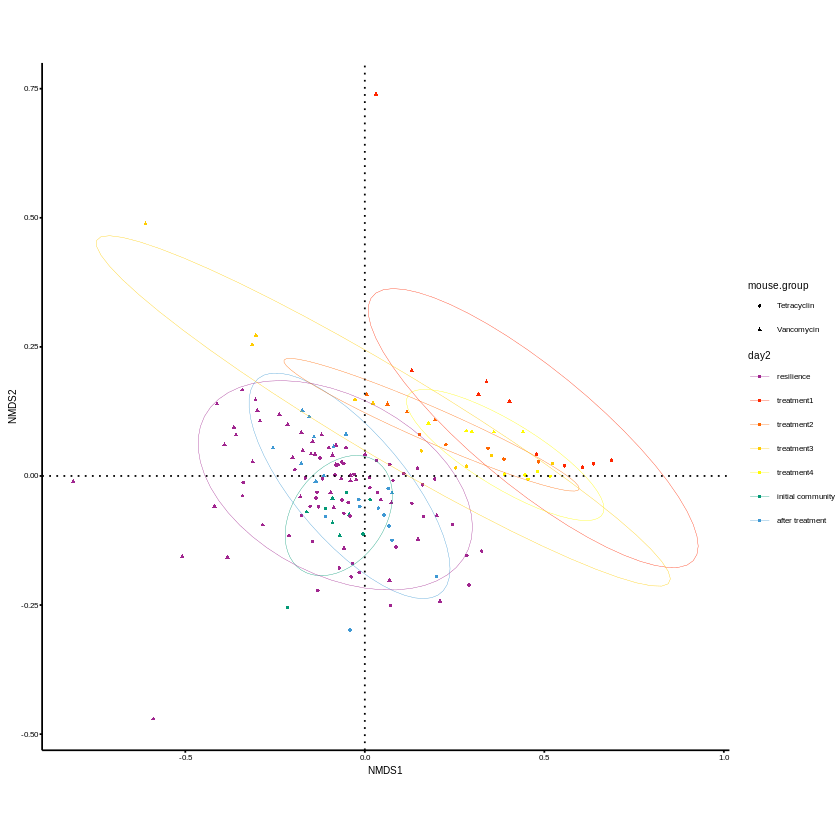

In [199]:
dat <- read.table("values.csv", header = T, sep = ";")
rownames(dat) <- paste0(dat$mouse, "_", dat$day)
dat$universal <- NULL

qpcr <- dat[, -c(1:5)]
qpcr <- apply(qpcr, 1, function(x)
  x / sum(x))
qpcr <- t(qpcr)


groups <-
  translateMouseIdToTreatmentGroup(substr(rownames(qpcr), 1, 4))
qpcr2 <-
  qpcr[which(groups == "Vancomycin" | groups == "Tetracyclin"), ]

nmds <- vegan::metaMDS(qpcr2, distance = "bray", trymax = 200)
data.scores <- as.data.frame(scores(nmds))
data.scores$mouse.id <- substr(rownames(data.scores), 1, 4)
data.scores$day <- as.integer(substr(rownames(data.scores), 6, 7))
data.scores$day3 <-
  translateMouseIdToTreatmentGroup(data.scores$mouse.id)
data.scores$mouse.group <-
  translateMouseIdToTreatmentGroup(data.scores$mouse.id)

data.scores$day2 <- "resilience"
data.scores[which(data.scores$day == 4), ]$day2 <- "treatment1"
data.scores[which(data.scores$day == 18), ]$day2 <- "treatment2"
data.scores[which(data.scores$day == 53), ]$day2 <- "treatment3"
data.scores[which(data.scores$day == 67), ]$day2 <- "treatment4"
data.scores[which(data.scores$day == 0), ]$day2 <-
  "initial community"
data.scores[which(data.scores$day > 67), ]$day2 <- "after treatment"

#data.scores[which(data.scores$mouse.id != "1696"),]$mouse.id <- ""

colorval <- c(
  "resilience" = "#A0258F",
  "treatment1" = "#FF2600",
  "treatment2" = "#FF6701",
  "treatment3" = "#FFCC01",
  "treatment4" = "#FFFB00",
  "initial community" = "#029975",
  "after treatment" = "#3E98D3"
)

library(ggplot2)
p <- ggplot(data.scores, aes(x = NMDS1, y = NMDS2, color = day2))
p <-
  p + geom_point(
    alpha = 1,
    stroke = 0,
    size = 1,
    aes(shape = mouse.group)
  )
p <- p + theme(
  plot.title = element_text(size = 8),
  axis.title.x = element_text(size = 8),
  axis.title.y = element_text(size = 8)
)
p <- p + theme(
  plot.title = element_text(size = 8),
  axis.title.x = element_text(size = 8),
  axis.title.y = element_text(size = 8)
)
p <- p + geom_hline(yintercept = 0, linetype = 3) + theme_pmuench()
#p <- p + geom_label(aes(label = day, fill = day2), color = "black", size = 1)
p <-
  p + geom_vline(xintercept = 0, linetype = 3) #+ stat_ellipse(size = .1)
p <- p + scale_size(range = c(1, 3))
p <- p + scale_color_manual(values = colorval)
p <- p + scale_shape_manual(values = c(16, 17))
p <- p + scale_fill_manual(values = colorval)
p <- p + stat_ellipse(size = .1)
p <-
  p + theme(aspect.ratio = 1) + theme(plot.title = element_text(size = 8))
p

In [ ]:
dat <- read.table("values.csv", header = T, sep = ";")
rownames(dat) <- paste0(dat$mouse, "_", dat$day)
dat$universal <- NULL

qpcr <- dat[, -c(1:5)]
qpcr <- apply(qpcr, 1, function(x)
  x / sum(x))
qpcr <- t(qpcr)
div <- vegan::vegdist(qpcr, method = "bray")
df <- as.matrix(div)

meta <- data.frame(sample = rownames(qpcr))

df <- reshape2::melt(df)
colnames(df) <- c("mouse.a", "mouse.b", "bc")

df$a.day <- as.integer(substr(df$mouse.a, 6, 7))
df$a.mouse.id <-  substr(df$mouse.a, 1, 4)
df$a.mouse.group <- translateMouseIdToTreatmentGroup(df$a.mouse.id)
df$a.phase_num <- binDaysByShortPhase(df$a.day)
#df[which(df$a.mouse.group == "Water"),]$a.phase_num <- 0 #set control group to zero

df$b.day <- as.integer(substr(df$mouse.b, 6, 7))
df$b.mouse.id <-  substr(df$mouse.b, 1, 4)
df$b.mouse.group <- translateMouseIdToTreatmentGroup(df$b.mouse.id)
df$b.phase_num <- binDaysByShortPhase(df$b.day)
#df[which(df$b.mouse.group == "Water"),]$b.phase_num <- 0 #set control group to zero

df <-
  df[which(df$a.mouse.id == df$b.mouse.id), ] # only compare same mice
df <- df[which(df$a.phase_num == 0 & df$b.phase_num == 1), ]
df <- df[which(df$a.day < df$b.day), ]
df <- df[which((df$b.day - df$a.day) < 9), ]

df$round <- 0
df[which(df$b.day == 4),]$round <- 1
df[which(df$b.day == 18),]$round <- 2
df[which(df$b.day == 53),]$round <- 3
df[which(df$b.day == 67),]$round <- 4

# make Water as reference
df$b.mouse.group <- as.factor(df$b.mouse.group)
df2 <-
  within(df, b.mouse.group <- relevel(b.mouse.group, ref = "Water"))

mod <- lm(bc ~ round + b.mouse.group, data = df2) 

In [ ]:
dat <- read.table("values.csv", header = T, sep = ";")
rownames(dat) <- paste0(dat$mouse, "_", dat$day)
dat$universal <- NULL
qpcr <- dat[, -c(1:5)]
qpcr <- apply(qpcr, 1, function(x)
  x / sum(x))
qpcr <- t(qpcr)
meta <- data.frame(sample = rownames(qpcr))
meta$day <- as.integer(substr(meta$sample, 6, 7))
meta$mouse.id <-  substr(meta$sample, 1, 4)
meta$mouse.group <- translateMouseIdToTreatmentGroup(meta$mouse.id)
meta$phase_num <- binDaysByShortPhase(meta$day)
meta[which(meta$mouse.group == "Water"), ]$phase_num <-
  0 #set control group to zero
pairing <- read.csv2("pairing.txt", sep = ";")
meta$pair3 <- pairing[match(meta$mouse.id, pairing$id), ]$pair3
adon.results <-
  adonis2(
    qpcr ~  mouse.group + pair3 + day + mouse.id + phase_num ,
    data = meta,
    method = "bray",
    perm = 5000,
    parallel = 12
  )